## Observations and Insights 

In [200]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [201]:
# Checking the number of mice in the DataFrame.
num_mice = len(mouse_study_df["Mouse ID"].value_counts())
num_mice

249

In [202]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_study_df.groupby(["Mouse ID", "Timepoint"])["Mouse ID"].count()
duplicate_df = pd.DataFrame(duplicate)
duplicate_mice_df = duplicate_df[duplicate_df["Mouse ID"] > 1]
duplicate_mice_df


Mouse ID
Mouse ID Timepoint          
g989     0                 2
         5                 2
         10                2
         15                2
         20                2

In [203]:
# Optional: Get all the data for the duplicate mouse ID. 


In [204]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df =  mouse_study_df.drop_duplicates()
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [205]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = len(clean_mice_df["Mouse ID"].value_counts())
clean_num_mice

249

## Summary Statistics

In [206]:
drug_regimen_ct = clean_mice_df.groupby(["Drug Regimen","Timepoint"])["Mouse ID"].count()
drug_reg_df = pd.DataFrame(data=drug_regimen_ct)
drug_reg_df

Mouse ID
Drug Regimen Timepoint          
Capomulin    0                25
             5                25
             10               25
             15               24
             20               23
...                          ...
Zoniferol    25               16
             30               15
             35               14
             40               14
             45               14

[100 rows x 1 columns]

In [207]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_mice_df.groupby("Drug Regimen")

mean = drug_regimen.mean()["Tumor Volume (mm3)"]
mean.name = "Mean"
median = drug_regimen.median()["Tumor Volume (mm3)"]
median.name = "Median"
variance = drug_regimen.var()["Tumor Volume (mm3)"]
variance.name = "Variance"
st_deviation = drug_regimen.std()["Tumor Volume (mm3)"]
st_deviation.name = "Standard deviation"
sem =  drug_regimen.sem()["Tumor Volume (mm3)"]
sem.name = "SEM"
# mice_summary_df = pd.DataFrame({"Mean":[mean], "Median":[median], "Variance":[variance], "Standard deviation":[st_deviation], "SEM":[sem]})
mice_summary_df = pd.DataFrame([mean, median, variance, st_deviation, sem]).T
mice_summary_df                          
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [208]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_df
# This method produces everything in a single groupby function.

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

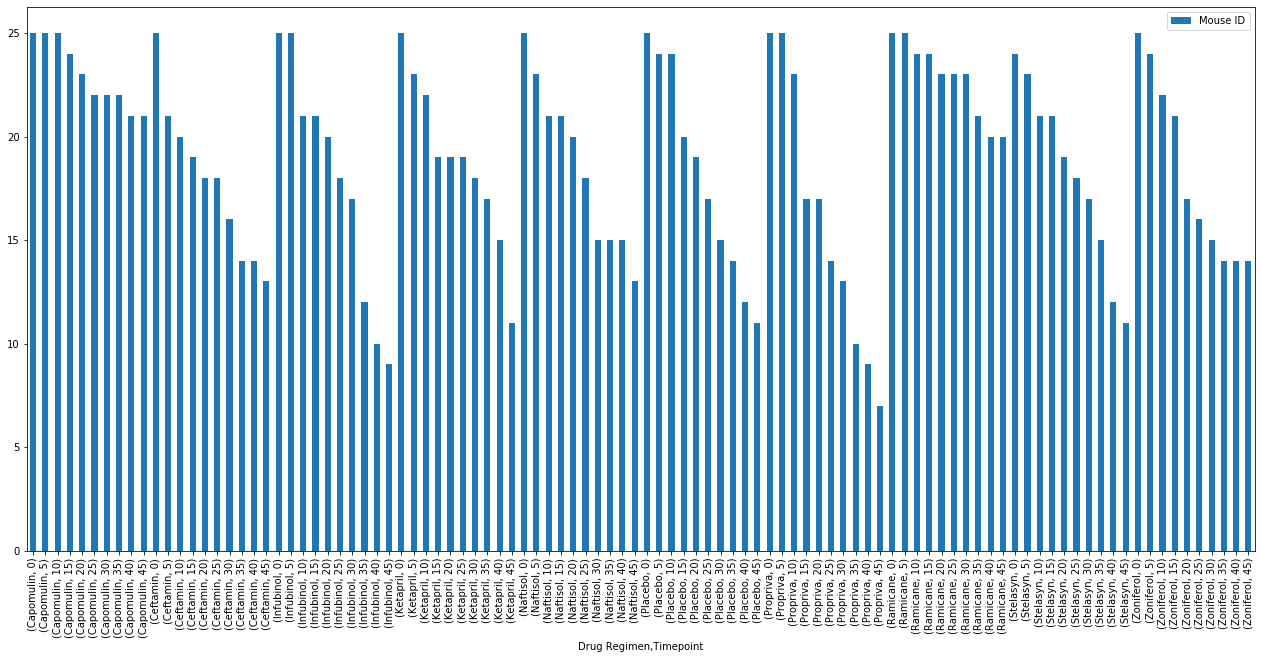

In [209]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

drug_reg_df.plot(kind="bar", y="Mouse ID", figsize=(22,10))
plt.show()

In [199]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
